## A Sample project
### Credit Card data to predict income levels of each customers (>50K or <=50K) 
#### A step by step by approach for model building

In this assignment students need to predict whether a person makes over 50K per year
or not from classic adult dataset using XGBoost. The description of the dataset is as
follows:

Data Set Information:
Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions: ((AAGE>16) &&
(AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information:|Listing of attributes:
-------- | --------
>50K,|<=50K.
age: |continuous.
workclass:| Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,Without-pay, Never-worked.
fnlwgt:| continuous.
education:| Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,9th, 7th-8th, 12th, Masters, 1st-4th,10th, Doctorate, 5th-6th, Preschool.
education-num:| continuous.
marital-status:| Married-civ-spouse, Divorced, Never-married, Separated, Widowed,Married-spouse-absent, Married-AF-spouse.
occupation:| Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship:| Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race:| White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex:| Female, Male.
capital-gain:| continuous.
capital-loss:| continuous.
hours-per-week:| continuous.
native-country:| United-States, Cambodia, England, Puerto-Rico, Canada, Germany,Outlying-US(Guam-USVI-etc), India, Japan,Greece, South, China, Cuba, Iran, Honduras,Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong,Holand-Netherlands.<br>

Following is the code to load required libraries and data:

In [2]:
# Loading the data
import pandas as pd
train = pd.read_csv("C:/Users/hiremamr/Documents/AcadGild/Assignments/train_gbW7HTd.csv")
test = pd.read_csv("C:/Users/hiremamr/Documents/AcadGild/Assignments/test_2AFBew7.csv")

#### Univariate Analysis

In [3]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [4]:
# Continuos Variables
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


In [6]:
# Categorical Variables
cat_vars = train.dtypes.loc[train.dtypes == 'object'].index
print (cat_vars)

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [8]:
# Use the apply functin to find the number of unique values in each item
train[cat_vars].apply(lambda x: len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

In [38]:
# Rename columns as some of the columns have .
col_name = {'Marital.Status':'Marital-Status','Native.Country':'Native-Country','Income.Group':'Income-Group','Hours.Per.Week':'Hours-Per-Week'}
train.rename(columns=col_name,inplace=True)
test.rename(columns=col_name,inplace=True)

In [29]:
train.columns

Index(['ID', 'Age', 'Workclass', 'Education', 'Marital-Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Hours-Per-Week', 'Native-Country',
       'Income-Group'],
      dtype='object')

In [16]:
# Analyzing Race and Native.Country
train['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [18]:
(train['Race'].value_counts()/train.shape[0])*100

White                 85.427352
Black                  9.594300
Asian-Pac-Islander     3.190934
Amer-Indian-Eskimo     0.955130
Other                  0.832284
Name: Race, dtype: float64

In [19]:
(train['Native-Country'].value_counts()/train.shape[0])*100

United-States                 89.585701
Mexico                         1.974755
Philippines                    0.608089
Germany                        0.420749
Canada                         0.371610
Puerto-Rico                    0.350112
El-Salvador                    0.325543
India                          0.307116
Cuba                           0.291760
England                        0.276404
Jamaica                        0.248764
South                          0.245693
China                          0.230337
Italy                          0.224195
Dominican-Republic             0.214981
Vietnam                        0.205768
Guatemala                      0.196554
Japan                          0.190412
Poland                         0.184270
Columbia                       0.181198
Taiwan                         0.156629
Haiti                          0.135131
Iran                           0.132060
Portugal                       0.113633
Nicaragua                      0.104419


In [20]:
train['Income-Group'].value_counts()/train.shape[0]

<=50K    0.75919
>50K     0.24081
Name: Income-Group, dtype: float64

In [21]:
train['Marital-Status'].value_counts()/train.shape[0]

Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: Marital-Status, dtype: float64

### Multivariate Analysis
* categorical - categorical
* continuous - continuous
* categorical - continuous

In [24]:
# Both Categorical
# Print the cross tabulation
ct = pd.crosstab(train['Sex'],train['Income-Group'],margins=True)
print(ct)

Income-Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


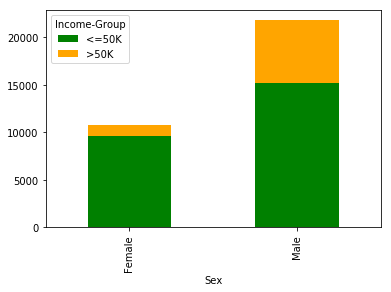

In [26]:
# We can also plot stacked bat chart
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar',stacked=True, grid=False, color=['green','orange'])

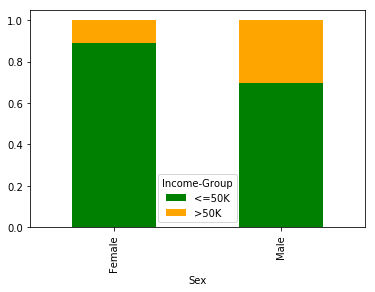

In [27]:
def perConvert(ser):
    return ser/float(ser[-1])
ct2 = ct.apply(perConvert, axis=1)
ct2.iloc[:-1,:-1].plot(kind='bar', stacked=True, grid=False, color = ['green','orange'])

Correlation is                      Age  Hours-Per-Week
Age             1.000000        0.068756
Hours-Per-Week  0.068756        1.000000


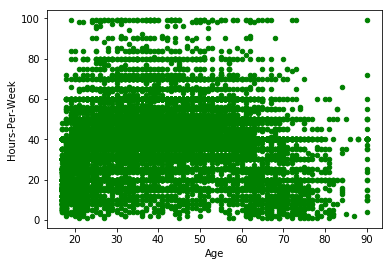

In [110]:
# When both continuos
train.plot('Age','Hours-Per-Week', kind='scatter',color='green')
print('Correlation is',train[['Age','Hours-Per-Week']].corr())

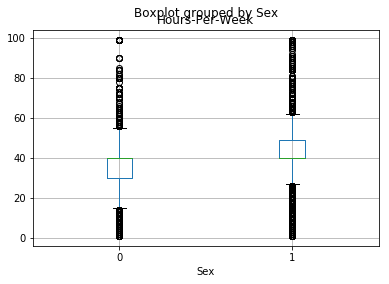

In [112]:
# Categorical and Continuos
train.boxplot(column = 'Hours-Per-Week',by='Sex')

In [35]:
oc = pd.crosstab(train['Occupation'],train['Income-Group'],margins=True)
print(oc)

Income-Group       <=50K  >50K    All
Occupation                           
Adm-clerical        3263   507   3770
Armed-Forces           8     1      9
Craft-repair        3170   929   4099
Exec-managerial     2098  1968   4066
Farming-fishing      879   115    994
Handlers-cleaners   1284    86   1370
Machine-op-inspct   1752   250   2002
Other-service       3158   137   3295
Priv-house-serv      148     1    149
Prof-specialty      2281  1859   4140
Protective-serv      438   211    649
Sales               2667   983   3650
Tech-support         645   283    928
Transport-moving    1277   320   1597
All                23068  7650  30718


#### Missing value treatment

In [36]:
train.isnull().sum()

ID                   0
Age                  0
Workclass         1836
Education            0
Marital-Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours-Per-Week       0
Native-Country     583
Income-Group         0
dtype: int64

In [39]:
test.apply(lambda x: sum(x.isnull()))

ID                  0
Age                 0
Workclass         963
Education           0
Marital-Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours-Per-Week      0
Native-Country    274
dtype: int64

In [ ]:
# thresh = int(0.30 * data.shape[0])
# data.dropna(thresh=thresh, axis=1).columns

In [ ]:
# Missing value Imputation
from scipy.stats import mode
mode(train['Workclass'].astype(str)).mode[0]


In [ ]:
var_to_impute = ['Native-Country','Occupation','Workclass']

for var in var_to_impute:
    train[var].fillna(mode(train[var].astype(str)).mode[0],inplace=True)
    test[var].fillna(mode(test[var].astype(str)).mode[0], inplace=True)

In [71]:
train.isnull().sum()

ID                0
Age               0
Workclass         0
Education         0
Marital-Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours-Per-Week    0
Native-Country    0
Income-Group      0
dtype: int64

#### Outlier Treatment

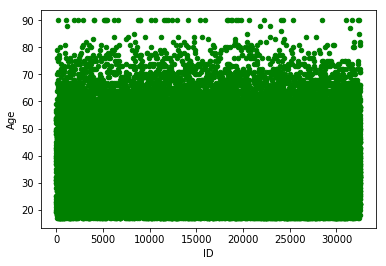

In [113]:
train.plot('ID','Age',kind='scatter',color='green')

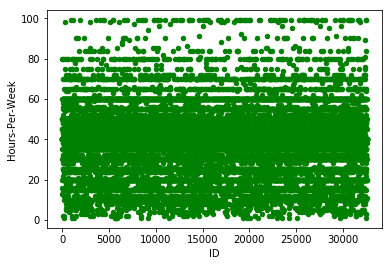

In [114]:
train.plot('ID','Hours-Per-Week',kind='scatter',color='green')

#### Variable Transoformation

In [76]:
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64

In [80]:
cat_to_combine = ['State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked']
for cat in cat_to_combine:
    train['Workclass'].replace({cat:'Others'},inplace=True)
    test['Workclass'].replace({cat:'Others'},inplace=True)

In [81]:
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Others              0.104266
Self-emp-not-inc    0.078038
Local-gov           0.064279
Name: Workclass, dtype: float64

In [82]:
# Combining the rest cat columns
cat_variables = list(train.dtypes.loc[train.dtypes=='object'].index)
cat_variables

['Workclass',
 'Education',
 'Marital-Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native-Country',
 'Income-Group']

In [83]:
cat_variables = cat_variables[1:]
cat_variables

['Education',
 'Marital-Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native-Country',
 'Income-Group']

In [84]:
train[cat_variables].apply(lambda x: len(x.unique()))

Education         16
Marital-Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native-Country    41
Income-Group       2
dtype: int64

##### Run a loop over these values and combine categories

In [88]:
for column in cat_variables:
    freq = train[column].value_counts()/train.shape[0]
    categories_to_combine = freq.loc[freq.values <0.05].index
    
    for cat in categories_to_combine:
        train[column].replace({cat:'Others'},inplace=True)
        test[column].replace({cat:'Others'},inplace=True)

In [89]:
train[cat_variables].apply(lambda x: len(x.unique()))

Education         5
Marital-Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native-Country    2
Income-Group      2
dtype: int64

### Predictive Modelling

In [92]:
# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
cat_variables = train.dtypes.loc[train.dtypes =='object'].index
cat_variables

Index(['Workclass', 'Education', 'Marital-Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native-Country', 'Income-Group'],
      dtype='object')

In [ ]:
le = LabelEncoder()
for var in cat_variables:
    train[var] = le.fit_transform(train[var])
    test[var] = le.fit_transform(test[var])

In [97]:
train.dtypes

ID                int64
Age               int64
Workclass         int32
Education         int32
Marital-Status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Hours-Per-Week    int64
Native-Country    int32
Income-Group      int32
dtype: object

#### Fit the model

In [99]:
from sklearn.tree import DecisionTreeClassifier
# Define Predictors except ID and target
dependent_var = 'Income-Group'
independent_var = [x for x in train.columns if x not in ['ID',dependent_var]]
print(independent_var)

['Age', 'Workclass', 'Education', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Hours-Per-Week', 'Native-Country']


In [100]:
# Initialize the algorithm
model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf=100,max_features='sqrt')
model.fit(train[independent_var],train[dependent_var])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [101]:
# Make predictions
predict_train = model.predict(train[independent_var])
predict_test = model.predict(test[independent_var])

In [102]:
# Analyze the results
from sklearn.metrics import accuracy_score
accu_train = accuracy_score(train[dependent_var],predict_train)
print ('train accuracy: %f'%accu_train)

train accuracy: 0.816406


In [104]:
predict_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int32)

In [ ]:
sample_submission = pd.DataFrame({'ID':test['ID'],'Income.Group':predict_test})
sample_submission.to_csv('C:\\Users\\hiremamr\\Documents\\AcadGild\\Assignments\\sample_submission.csv',index=False)

In [106]:
import os
os.getcwd()

'C:\\Users\\hiremamr\\Documents\\AcadGild\\Assignments'